In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [2]:
import numpy as np

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 10

In [4]:
def analitical_solution(psi_0,x_start,x_end,dt,nt,v):
    p = ((x-v*nt*dt - x_start) % (x_end-x_start) )+ x_start
    return psi_0(p)

In [5]:
def psi_0(x):
    a = 5
    return 8*a**3 / (x**2 + 4*a**2)

nx = 100
x_start = - 100
x_end = 100
dx = (x_end - x_start)/nx
x  = np.arange(-100, 100, dx)
dt = 1
nt = 1000
v = -1

In [6]:
from PyMPDATA import Options
from PyMPDATA import Stepper
optionsDPDC = Options(n_iters=2, DPDC=True)
stepperDPDC = Stepper(options=optionsDPDC, grid=(nx,))
optionsMPDATA_1 = Options(n_iters=2, DPDC=False)
stepperMPDATA_1 = Stepper(options=optionsMPDATA_1, grid=(nx,))
optionsMPDATA_2 = Options(n_iters=3, DPDC=False)
stepperMPDATA_2 = Stepper(options=optionsMPDATA_2, grid=(nx,))
optionsMPDATA_3 = Options(n_iters=4, DPDC=False)
stepperMPDATA_3 = Stepper(options=optionsMPDATA_3, grid=(nx,))

In [7]:
from PyMPDATA import ScalarField
from PyMPDATA import VectorField
from PyMPDATA import PeriodicBoundaryCondition
from PyMPDATA import Options
from PyMPDATA import Stepper
import numpy as np

halo = optionsDPDC.n_halo
advecteeDPDC = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advector = VectorField(
    data=(np.full(nx+1, v*dt/dx),),
    halo=halo,
    boundary_conditions=(PeriodicBoundaryCondition(),)    
)
advecteeMPDATA_1 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advecteeMPDATA_2 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advecteeMPDATA_3 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)

In [8]:
from PyMPDATA import Solver
solverDPDC = Solver(stepper=stepperDPDC, advectee=advecteeDPDC, advector=advector)
solverMPDATA_1 = Solver(stepper=stepperMPDATA_1, advectee=advecteeMPDATA_1, advector=advector)
solverMPDATA_2 = Solver(stepper=stepperMPDATA_2, advectee=advecteeMPDATA_2, advector=advector)
solverMPDATA_3 = Solver(stepper=stepperMPDATA_3, advectee=advecteeMPDATA_3, advector=advector)
solverMPDATA_1.advance(nt)
solverMPDATA_2.advance(nt)
solverMPDATA_3.advance(nt)
solverDPDC.advance(nt)
true_solution = analitical_solution(psi_0,x_start,x_end,dt,nt,v)

In [9]:
from matplotlib import pyplot

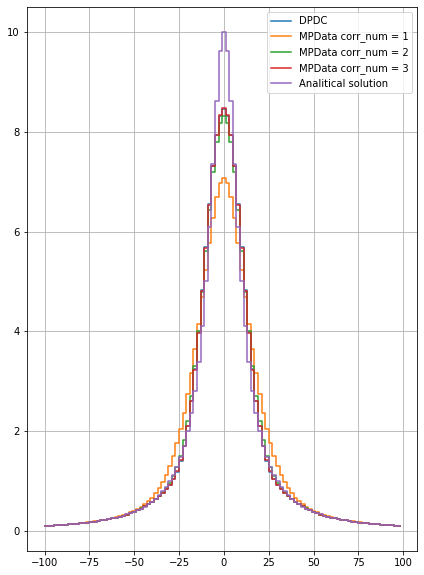

In [10]:
pyplot.step(x, solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x, solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x, solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x, solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.step(x, true_solution,label="Analitical solution" ,where='mid')
pyplot.grid()
pyplot.legend()
pyplot.show()

Error plot: Analitical - Numerical solution


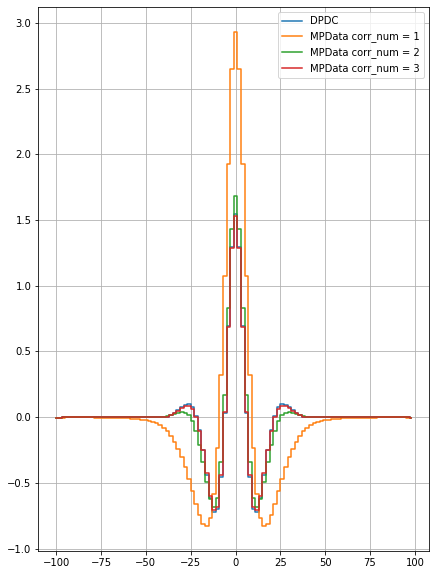

In [11]:
print("Error plot: Analitical - Numerical solution")
pyplot.step(x,true_solution - solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.grid()
pyplot.legend()
pyplot.show()

In [12]:
def psi_1(x):
    return abs(x)**(1/2)/10
x_start = - 100
x_end =   100
x  = np.arange(-100, 100, dx)
dx = 2
dt = 1
nt = 1000
v = - 1

In [13]:
optionsDPDC = Options(n_iters=2, DPDC=True)
stepperDPDC = Stepper(options=optionsDPDC, grid=(nx,))
optionsMPDATA_1 = Options(n_iters=2, DPDC=False,infinite_gauge = True)
stepperMPDATA_1 = Stepper(options=optionsMPDATA_1, grid=(nx,))
optionsMPDATA_2 = Options(n_iters=3, DPDC=False)
stepperMPDATA_2 = Stepper(options=optionsMPDATA_2, grid=(nx,))
optionsMPDATA_3 = Options(n_iters=4, DPDC=False)
stepperMPDATA_3 = Stepper(options=optionsMPDATA_3, grid=(nx,))
halo = optionsDPDC.n_halo
advecteeDPDC = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advector = VectorField(
    data=(np.full(nx+1, v*dt/dx),),
    halo=halo,
    boundary_conditions=(PeriodicBoundaryCondition(),)    
)
advecteeMPDATA_1 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advecteeMPDATA_2 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advecteeMPDATA_3 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)

In [14]:
solverDPDC = Solver(stepper=stepperDPDC, advectee=advecteeDPDC, advector=advector)
solverMPDATA_1 = Solver(stepper=stepperMPDATA_1, advectee=advecteeMPDATA_1, advector=advector)
solverMPDATA_2 = Solver(stepper=stepperMPDATA_2, advectee=advecteeMPDATA_2, advector=advector)
solverMPDATA_3 = Solver(stepper=stepperMPDATA_3, advectee=advecteeMPDATA_3, advector=advector)
solverMPDATA_1.advance(nt)
solverMPDATA_2.advance(nt)
solverMPDATA_3.advance(nt)
solverDPDC.advance(nt)
true_solution = analitical_solution(psi_1,x_start,x_end,dt,nt,v)

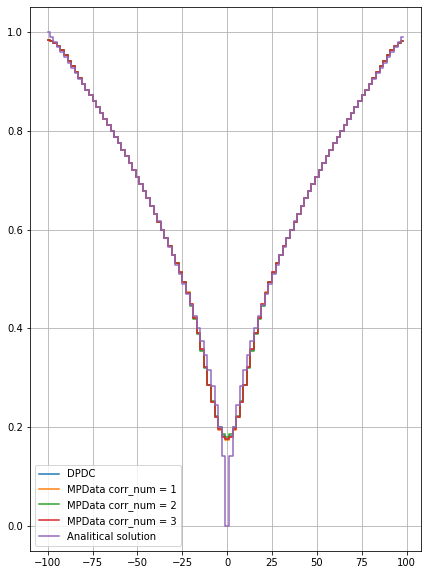

In [15]:
pyplot.step(x, solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x, solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x, solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x, solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.step(x, true_solution,label="Analitical solution" ,where='mid')
pyplot.grid()
pyplot.legend()
pyplot.show()

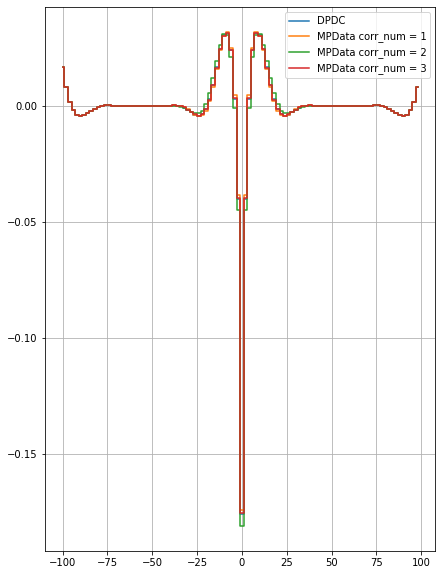

In [16]:
pyplot.step(x,true_solution - solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.grid()
pyplot.legend()
pyplot.show()